In [81]:
from torchvision.datasets import ImageFolder
import cv2
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim 

In [82]:
preprocessing = transforms.Compose(transforms = [
    transforms.Resize(size = (150, 150)),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels =1)
])

In [83]:
img_root = "C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog"
imgDS = ImageFolder(root = img_root, transform = preprocessing)

In [84]:
print(len(imgDS), type(imgDS),imgDS.classes, imgDS.class_to_idx)

115 <class 'torchvision.datasets.folder.ImageFolder'> ['cat', 'dog'] {'cat': 0, 'dog': 1}


In [85]:
imgDS.imgs

[('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\19d4e7d7802138ff14ef7956cf4b8d64.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\257c2acebc4b7b7099829b3cfd60d950.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\2LgDTlQc_400x400.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\2fc9ab954ee4757e8a899a10251c0ef3.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\720a16efaa60dfd5e771e80e7238318b.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\88fd7c99a4d8bfa2a36ed595f63b1836.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\9b54785154a6a876df458e2fd6d1568f.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\D0AT-D5U8AAkU-o.jpg',
  0),
 ('C:/Users/kdp/PycharmProjects/EXAM_DL/KDT_10_OPEN_CV/work/CatDog\\cat\\D7u8cokU8AAVUZM.

dataset에서 dataloader를 분리해보자

In [86]:
from torch.utils.data import DataLoader
DataLoader

torch.utils.data.dataloader.DataLoader

(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)


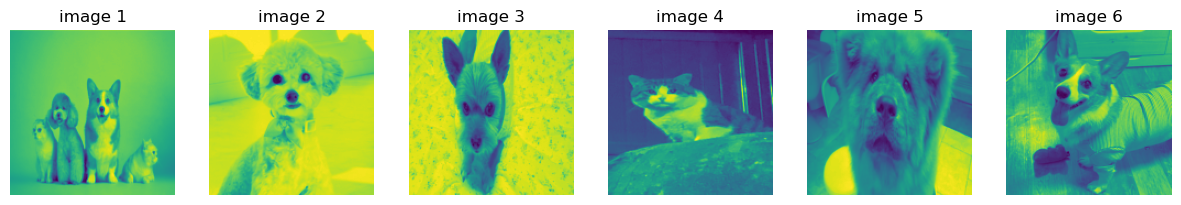

In [87]:
from torch.utils.data import DataLoader
import numpy as np
count = 1
train_dl = DataLoader(dataset = imgDS, shuffle = True)
plt.figure(figsize = (15,15))
for (img, label) in train_dl:
    # print(f"[img.shape] {img.shape} [label] {label}")
    np_img = np.array(img).squeeze()
    print(np_img.shape)
    plt.subplot(6,6,count)
    plt.imshow(np_img)
    plt.axis('off')
    plt.title(f"image {count}")
    count +=1
    if count == 7:
        break
        
# transforms.Grayscale(num_output_channels =1) 하면 흑백으로 다 나와야하는거 아닌가??

In [88]:
# 모델 설계

class cat_cnn(nn.Module):
    def __init__(self):
        super(cat_cnn, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 5, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv2d(in_channels = 5, out_channels = 3, kernel_size = 3, stride = 1, padding = 'same')
        self.pool = nn.MaxPool2d(kernel_size = 3, stride = 1)
        self.layer1 = nn.Linear(146,25)
        self.layer2 = nn.Linear(25,10)
        self.layer3 = nn.Linear(10,1)
        
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.relu(x)
        return x

In [89]:
# 학습
model = cat_cnn()
optimizer = torch.optim.Adam(model.parameters())
print(model)

cat_cnn(
  (conv1): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv2): Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (layer1): Linear(in_features=146, out_features=25, bias=True)
  (layer2): Linear(in_features=25, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)


In [90]:
# 학습 진행
def train(dataloader):
    model.train()
    for (image, label) in dataloader:
        optimizer.zero_grad()
        predict_label = model(image)
        loss = F.binary_cross_entropy(predict_label, label)
        loss.backward()
        optimizer.step()
        
    print(f"Train Loss : {loss}")
train(imgDS)

AttributeError: 'int' object has no attribute 'size'